In [5]:
import numpy as np
import pandas as pd

In [8]:
online_retail = pd.read_excel('Online Retail.xlsx')

In [9]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
online_retail = online_retail.dropna()

In [14]:
online_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
new_online_retail = online_retail.drop(columns = ['InvoiceDate','StockCode','InvoiceNo','Description','CustomerID'])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
new_online_retail['Country'] = le.fit_transform(new_online_retail['Country'])

In [18]:
new_online_retail

,Quantity,UnitPrice,Country
0,6,2.55,35
1,6,3.39,35
2,8,2.75,35
3,6,3.39,35
4,6,3.39,35
...,...,...,...
541904,12,0.85,13
541905,6,2.10,13
541906,4,4.15,13
541907,4,4.15,13


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
new_online_retail = sc.fit_transform(new_online_retail)
new_online_retail = pd.DataFrame(new_online_retail)
new_online_retail.columns = ['Quantity', 'UnitPrice', 'Country']

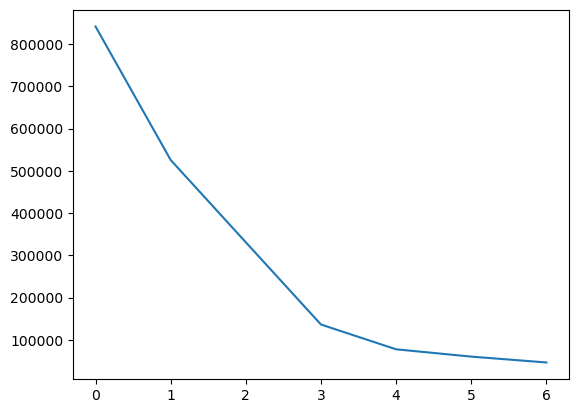

In [22]:
from sklearn.cluster import KMeans
X = new_online_retail

import matplotlib.pyplot as plt
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [23]:
kmeans = KMeans(n_clusters=3, max_iter=25)
kmeans.fit(X)

KMeans(max_iter=25, n_clusters=3)

In [24]:
kmeansdplus = KMeans(n_clusters = 3,init = 'k-means++')

In [25]:
kmeansdplus.fit(X)
print(kmeansdplus.cluster_centers_)

[[-5.15864897e-03 -2.88340490e-03  3.01885962e-01]
 [-5.25197734e-02  5.62165426e+02  3.22364144e-01]
 [ 5.26991931e-02  1.39574293e-02 -3.08389957e+00]]


In [26]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

In [27]:
clus_labels = pd.DataFrame(kmeans.labels_, columns = ['Cluster Labels'])

In [28]:
result = pd.concat([X,clus_labels], axis=1)

In [29]:
result.head()

,Quantity,UnitPrice,Country,Cluster Labels
0,-0.024373,-0.013135,0.322364,0
1,-0.024373,-0.001017,0.322364,0
2,-0.016331,-0.010250,0.322364,0
3,-0.024373,-0.001017,0.322364,0
4,-0.024373,-0.001017,0.322364,0


In [31]:
df = pd.read_csv('Mall_Customers.csv')

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [34]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

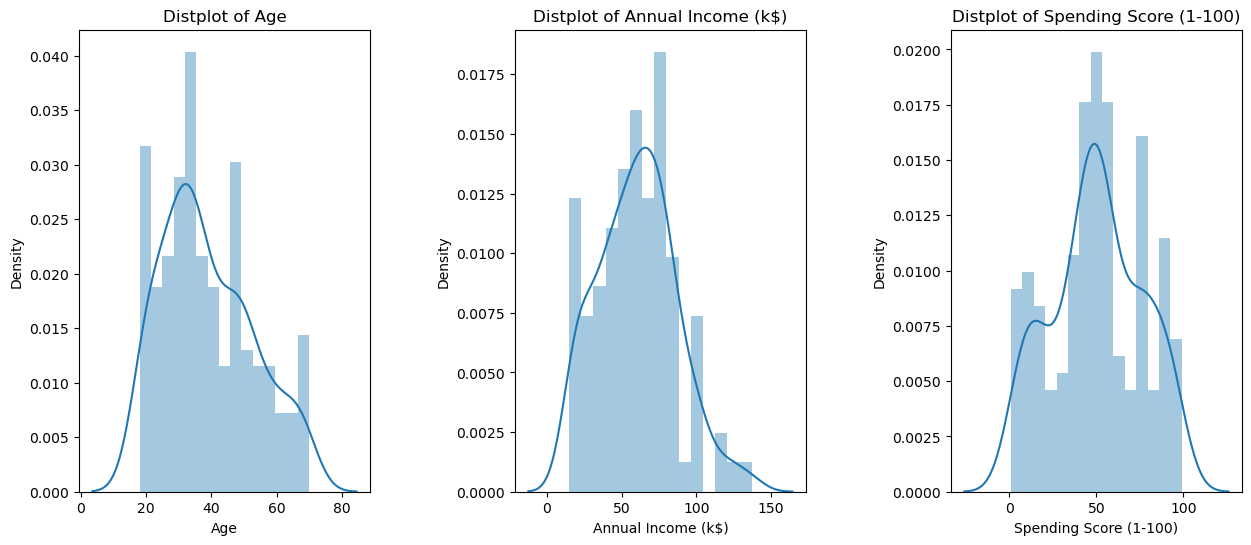

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [39]:
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


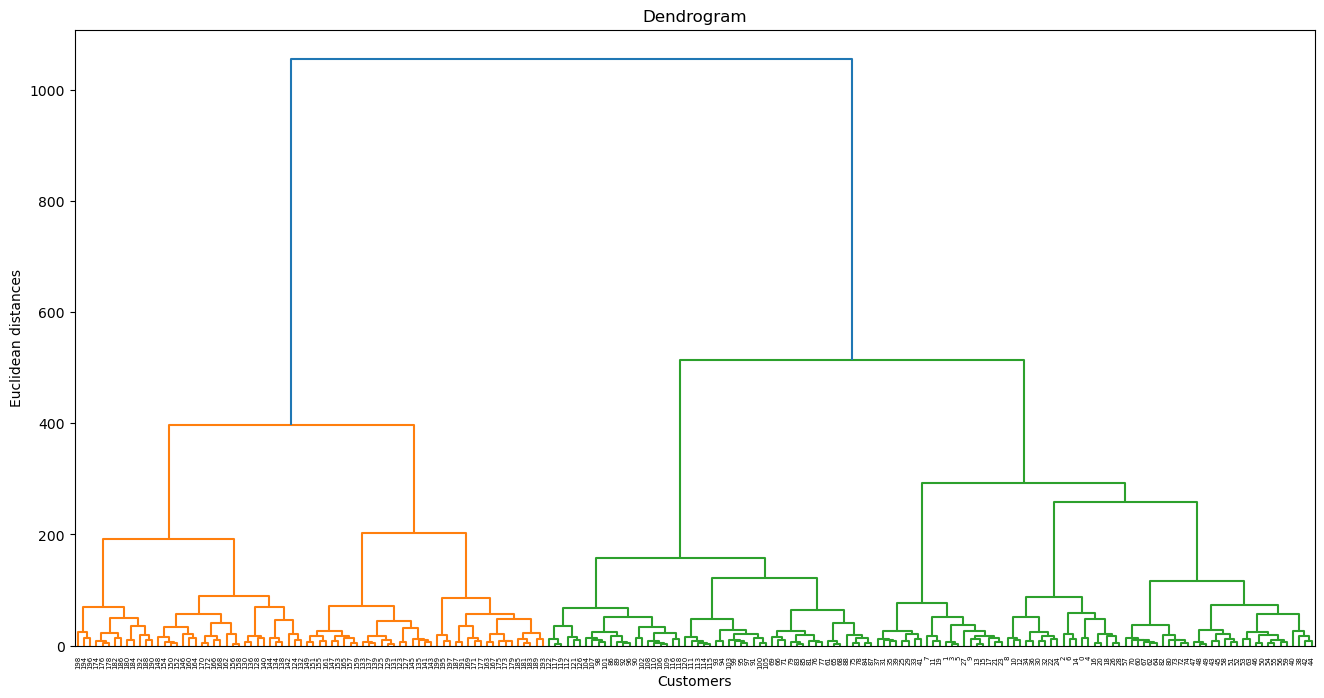

In [40]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [45]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
print(y_hc)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [46]:
df['cluster'] = pd.DataFrame(y_hc)

In [47]:
df.iloc[:, [3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


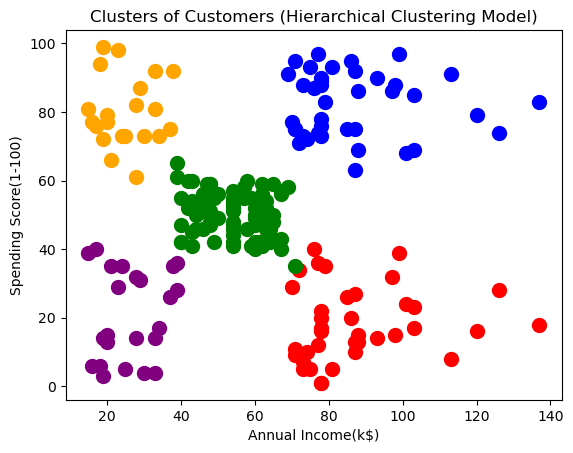

In [48]:
X = df.iloc[:, [3,4]].values

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [49]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [50]:
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [51]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
sc1 = StandardScaler()
X1 = sc1.fit_transform(iris_df)
iris_df = pd.DataFrame(X1)
iris_df.columns = ['sepal length', 'sepal width', 'petal length','peetal width']

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

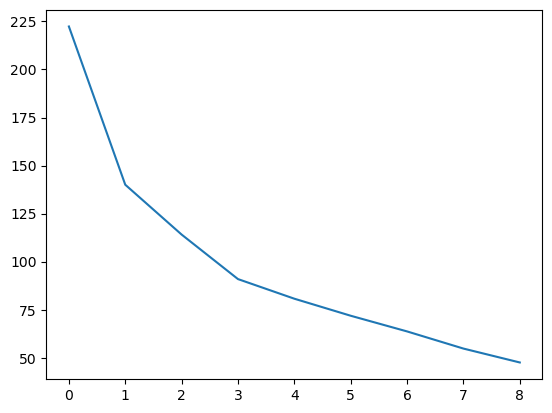

In [55]:
import matplotlib.pyplot as plt
ssd1 = []
sil_score = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X1)
    cluster_labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    sil_score.append(silhouette_avg)
    ssd1.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd1)

In [56]:
print(sil_score)

[0.5817500491982808, 0.4630420362927048, 0.3844714602625276, 0.3423633957670477, 0.33992272934600654, 0.3428602982112565, 0.32414953497856985, 0.3366692562767644, 0.35775582744530754]


In [57]:
# optimum number of clusters = 2

In [58]:
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(X1)

KMeans(max_iter=100, n_clusters=2)

In [59]:
clus_labels1 = pd.DataFrame(kmeans.labels_, columns = ['Cluster Labels'])

In [60]:
result1 = pd.concat([pd.DataFrame(df),clus_labels1], axis=1)

In [61]:
result1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Cluster Labels
0,1,1,19,15,39,3,1.0
1,2,1,21,15,81,4,1.0
2,3,0,20,16,6,3,1.0
3,4,0,23,16,77,4,1.0
4,5,0,31,17,40,3,1.0
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,NaN
196,197,0,45,126,28,0,NaN
197,198,1,32,126,74,1,NaN
198,199,1,32,137,18,0,NaN


/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

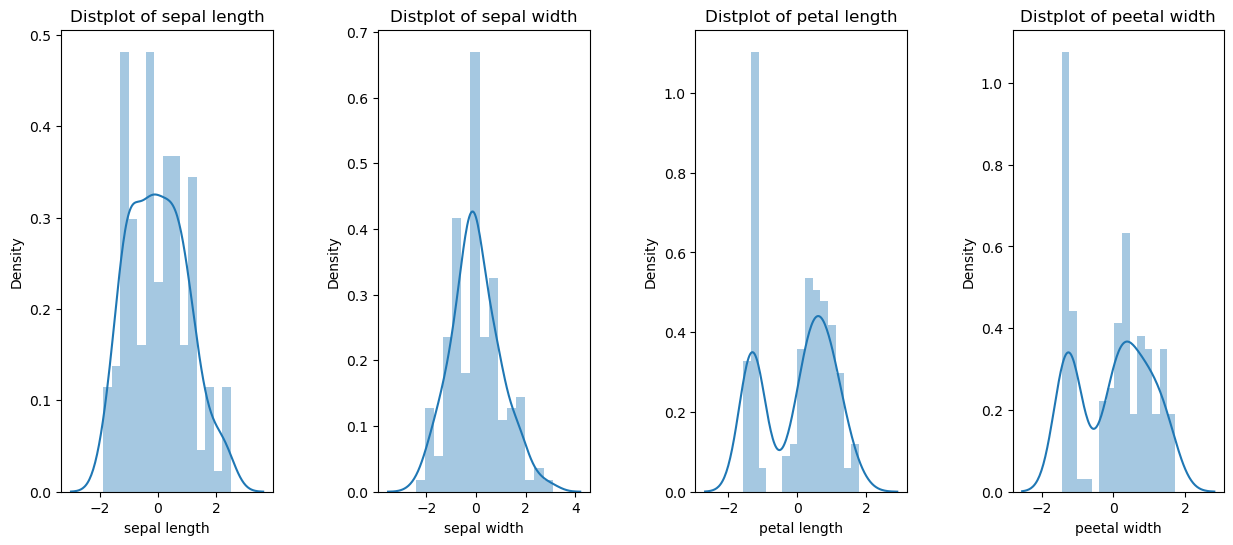

In [62]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['sepal length' , 'sepal width' , 'petal length','peetal width']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(iris_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

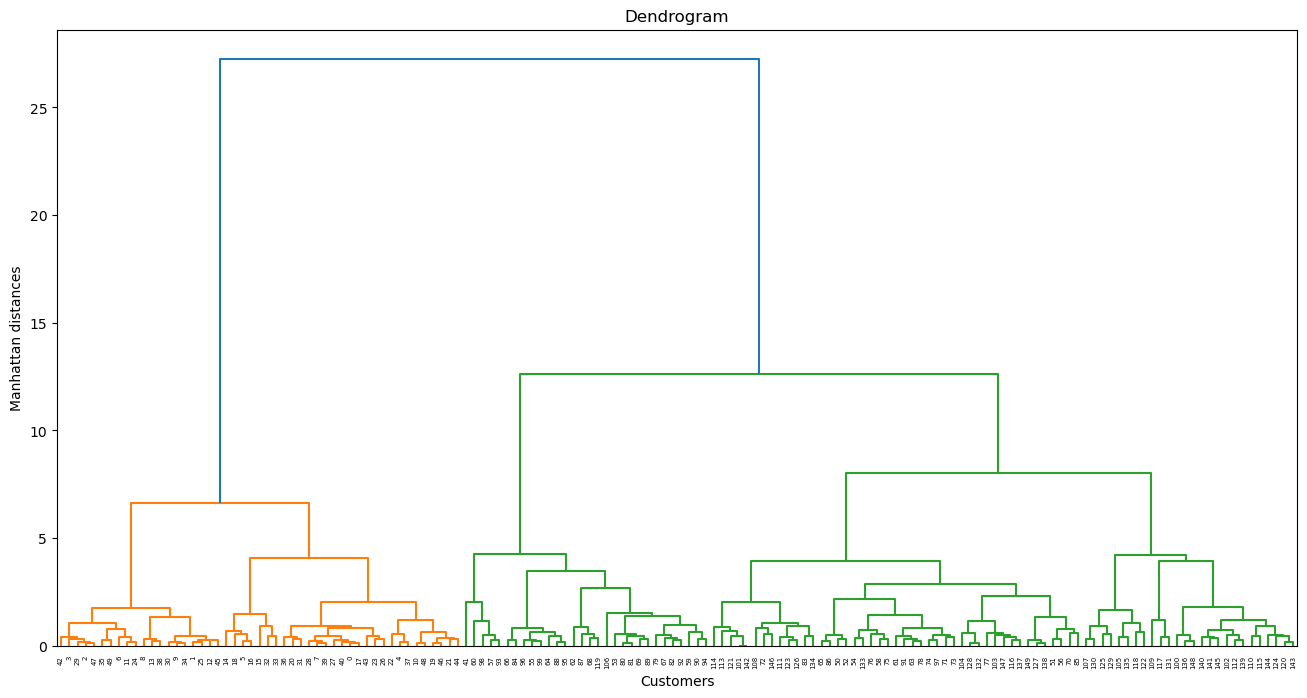

In [63]:
plt.figure(1, figsize = (16 ,8))
dendrogram2 = sch.dendrogram(sch.linkage(iris_df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Manhattan distances')
plt.show()

In [83]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

y_hc1 = hc1.fit_predict(iris_df)

In [84]:
iris_df['cluster'] = pd.DataFrame(y_hc1)

In [85]:
iris_df.head()

,sepal length,sepal width,petal length,peetal width,cluster
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


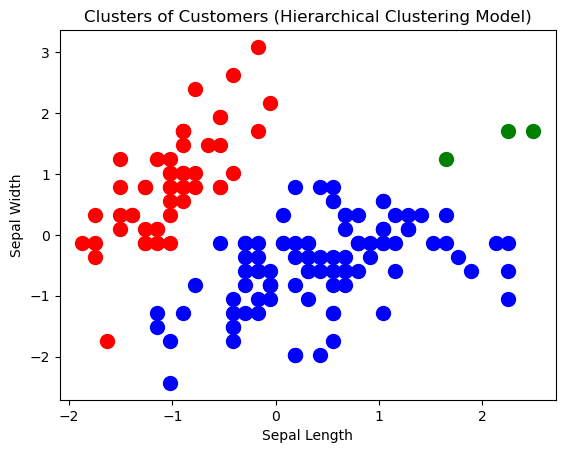

In [86]:
X_1 = iris_df.iloc[:, [0,1]].values
plt.scatter(X_1[y_hc1==0, 0], X_1[y_hc1==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_1[y_hc1==1, 0], X_1[y_hc1==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_1[y_hc1==2, 0], X_1[y_hc1==2, 1], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()